## Metis ML Classification Project

Chaya Wurman

Goal: Given the CDC NHANES (National Health and Nutrition Examination Survey) data,
can we predict if a patient has had a stroke. Strokes are caused by many medical and
lifestyle factors, and knowing which factors are highly correlated with strokes can
help better predict those who are at higher risk and help mitigate the risk before
a potential life-threatening event happens.

This notebook contains the final models using logistic regression & scoring for our goal!

In [1]:
# Import all our necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score, precision_score, roc_curve, auc

In [25]:
# Load all the data
data = pd.read_csv("data_feature_engineered.csv")
# drop the first col from the csv
data = data.iloc[: , 1:]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5583 entries, 0 to 5582
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   chest_pain                                  5583 non-null   float64
 1   high_blood_pressure_diagnosed               5583 non-null   float64
 2   high_blood_cholesterol                      5583 non-null   float64
 3   overweight_diagnosed                        5583 non-null   float64
 4   coronary_heart_disease                      5583 non-null   float64
 5   LABEL_had_stroke                            5583 non-null   float64
 6   diabetes_diagnosed                          5583 non-null   float64
 7   diabetes_high_blood_sugar_but_not_diabetes  5583 non-null   float64
 8   smoking_smoked_at_least_100_cigarettes      5583 non-null   float64
 9   income_family_monthly                       5583 non-null   float64
 10  alcohol_use_

In [31]:
# Trees will require our data to be label encoded

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["marital_status"] = encoder.fit_transform(data["marital_status"])
data["race"] = encoder.fit_transform(data["race"])


In [32]:
# Only take in a subset of features related to demographics
data = data[["income_family_monthly", "age_years","race","highest_education_level","marital_status", "LABEL_had_stroke"]]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5583 entries, 0 to 5582
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   income_family_monthly    5583 non-null   float64
 1   age_years                5583 non-null   float64
 2   race                     5583 non-null   int64  
 3   highest_education_level  5583 non-null   float64
 4   marital_status           5583 non-null   int64  
 5   LABEL_had_stroke         5583 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 261.8 KB


In [33]:
# Split data into train and test
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns != "LABEL_had_stroke"]
y = data.LABEL_had_stroke

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)



In [34]:
# Use SMOTENC since we have categorical and
from imblearn.over_sampling import SMOTENC

categorial_indices = [2, 3, 4]
smote_nc = SMOTENC(categorical_features=categorial_indices, random_state=0)
X_train, y_train = smote_nc.fit_resample(X_train, y_train)



Metrics for Logistic Regression
  - Accuracy: 0.7170993733213966
  - Recall: 0.6829268292682927
  - Precision: 0.08459214501510574
  - F1 Score: 0.15053763440860216
  - AUC: 0.7006641581285702


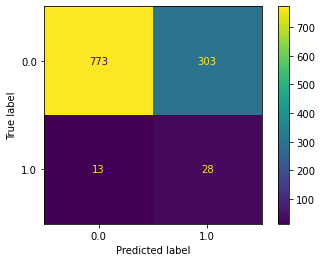

In [35]:
# cols_to_drop = ["gender", "marital_status"]
# X_train = X_train.drop(columns=cols_to_drop)
# X_test = X_test.drop(columns=cols_to_drop)

logreg = LogisticRegression(max_iter=50)
logreg.fit(X_train, y_train)

from sklearn.metrics import recall_score, accuracy_score, precision_score, roc_curve, auc, f1_score

def print_basic_metrics(model_name, y_true, y_pred):
    print(f"Metrics for {model_name}")
    print(f"  - Accuracy: {accuracy_score(y_true, y_pred)}")
    print(f"  - Recall: {recall_score(y_true, y_pred)}")
    print(f"  - Precision: {precision_score(y_true, y_pred)}")
    print(f"  - F1 Score: {f1_score(y_true, y_pred)}")
    fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1)
    print(f"  - AUC: {auc(fpr, tpr)}")

print_basic_metrics("Logistic Regression", y_test, logreg.predict(X_test))


from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)


Feature income_family_monthly, Score -0.17137153855882817
Feature age_years, Score 0.08746981396938716
Feature race, Score 0.19904472187422606
Feature highest_education_level, Score -0.08931927190473393
Feature marital_status, Score -0.27227003257175725


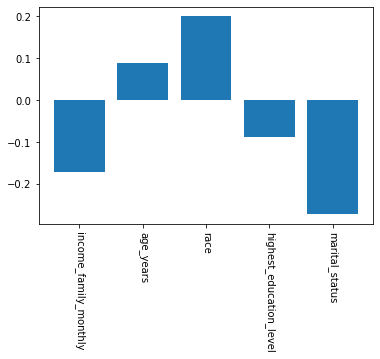

In [36]:
# Lastly, get the coefficients for all these so we can have a ranked list of the most important
importance = logreg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print(f"Feature {X_train.columns[i]}, Score {importance[i]}")
# plot feature importance
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), X_train.columns, rotation=-90)
plt.show()